<a href="https://colab.research.google.com/github/MaryamAshraff2/unsupervised-housing-clustering/blob/main/kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-MEANS CLUSTERING**

**UPLOADING DATASET**

In [37]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [38]:
from google.colab import files
import pandas as pd
uploaded = files.upload()
filename = next(iter(uploaded))
df = pd.read_csv(filename)

Saving housing - housing (1).csv to housing - housing (1) (1).csv


In [ ]:
#If you want to interact with the dataset
# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=df)

**EXPLORATORY DATA ANALYSIS**

In [39]:
display(df)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  median_house_value  \
0             322         126         8.3252              452600   
1            2401        1138         8.3014              358500   
2             496         177         7.2574              352100   
3             558         219         5.6431              341300   
4             565         259         3.8462              342200   
...           ...         ...            ...                 ...   
20635         845         330         1.5603               78100   
20636         356         114         2.5568               77100   
20637        1007         433         1.7000               92300   
20638         741         349         1.8672               84700   
20639        1387         530         2.3886               89400   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [40]:
# Display basic information
display(df.info())
# Display descriptive statistics
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


None

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

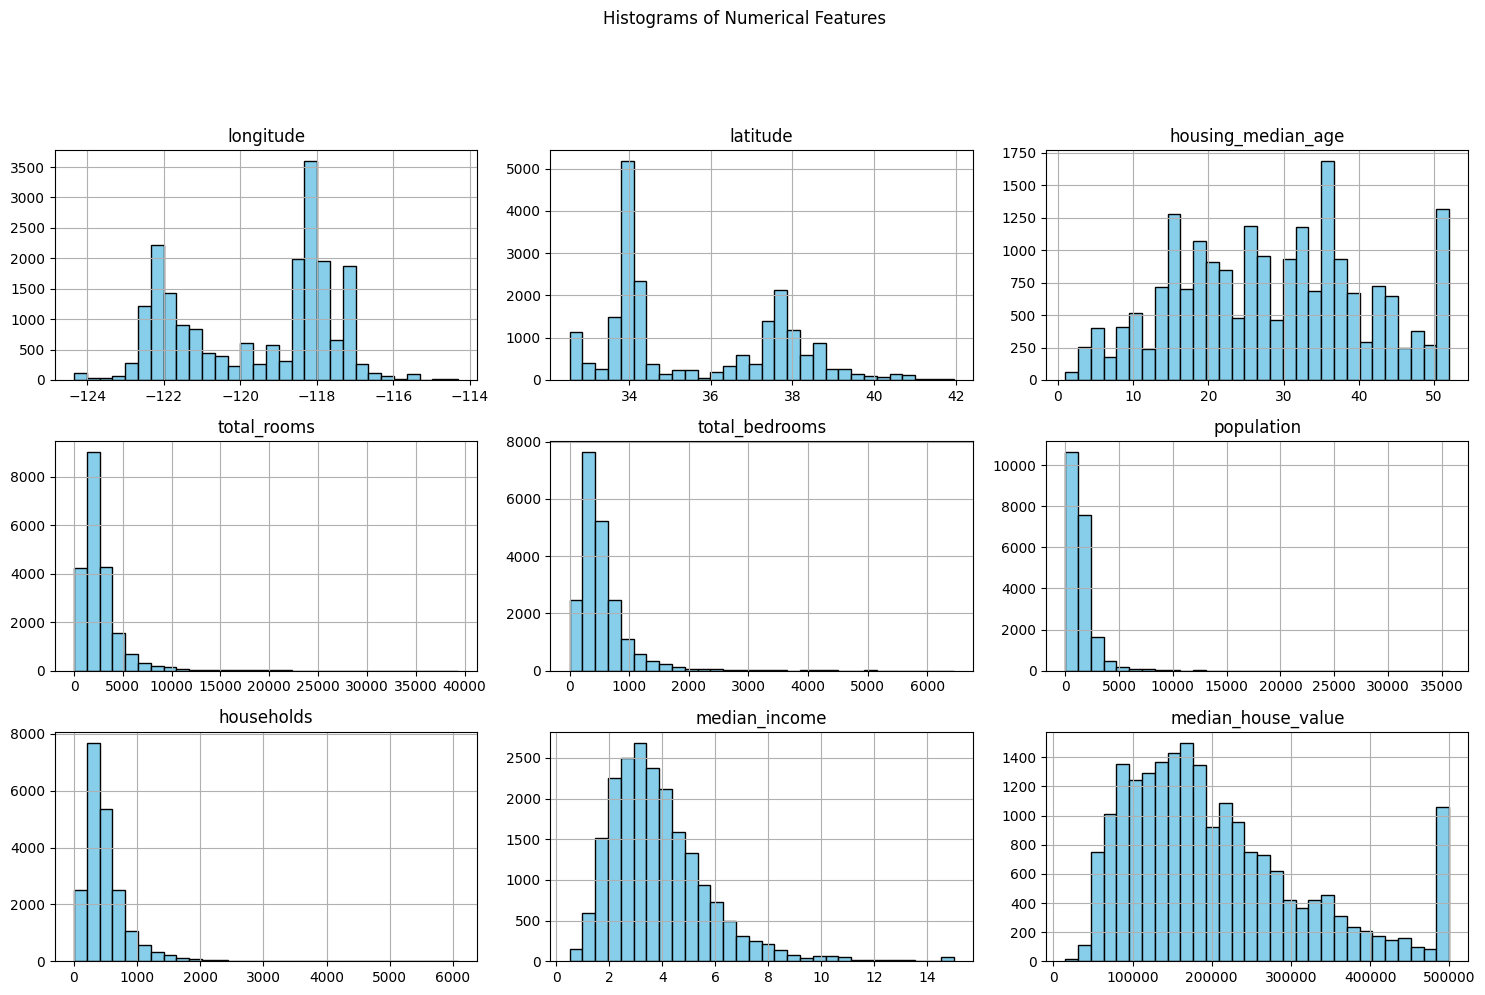

In [41]:
# Plotting histograms for numerical features
df.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

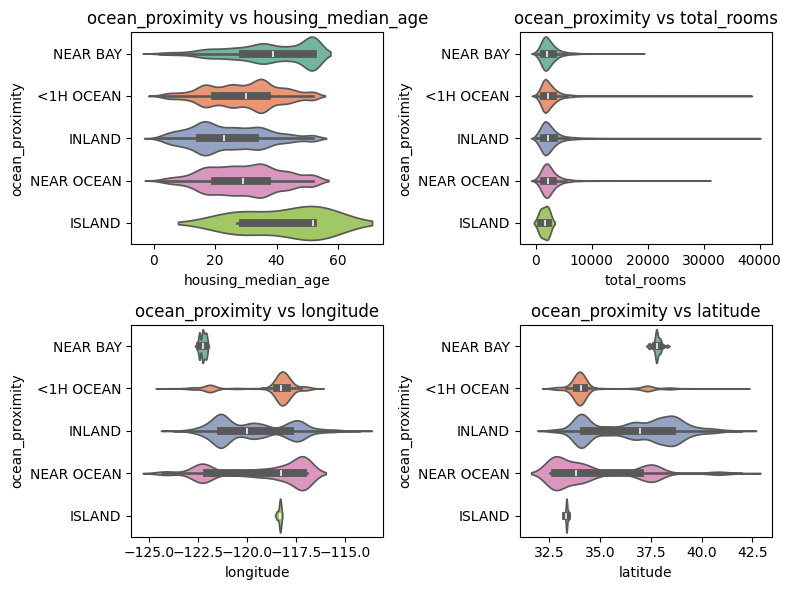

In [42]:
violin_features = ['housing_median_age', 'total_rooms', 'longitude', 'latitude']

plt.figure(figsize=(8, 6))
for i, feature in enumerate(violin_features):
    plt.subplot(2, 2, i+1)
    sns.violinplot(data=df, x=feature, y='ocean_proximity', palette='Set2')
    plt.title(f'ocean_proximity vs {feature}')
plt.tight_layout()
plt.show()

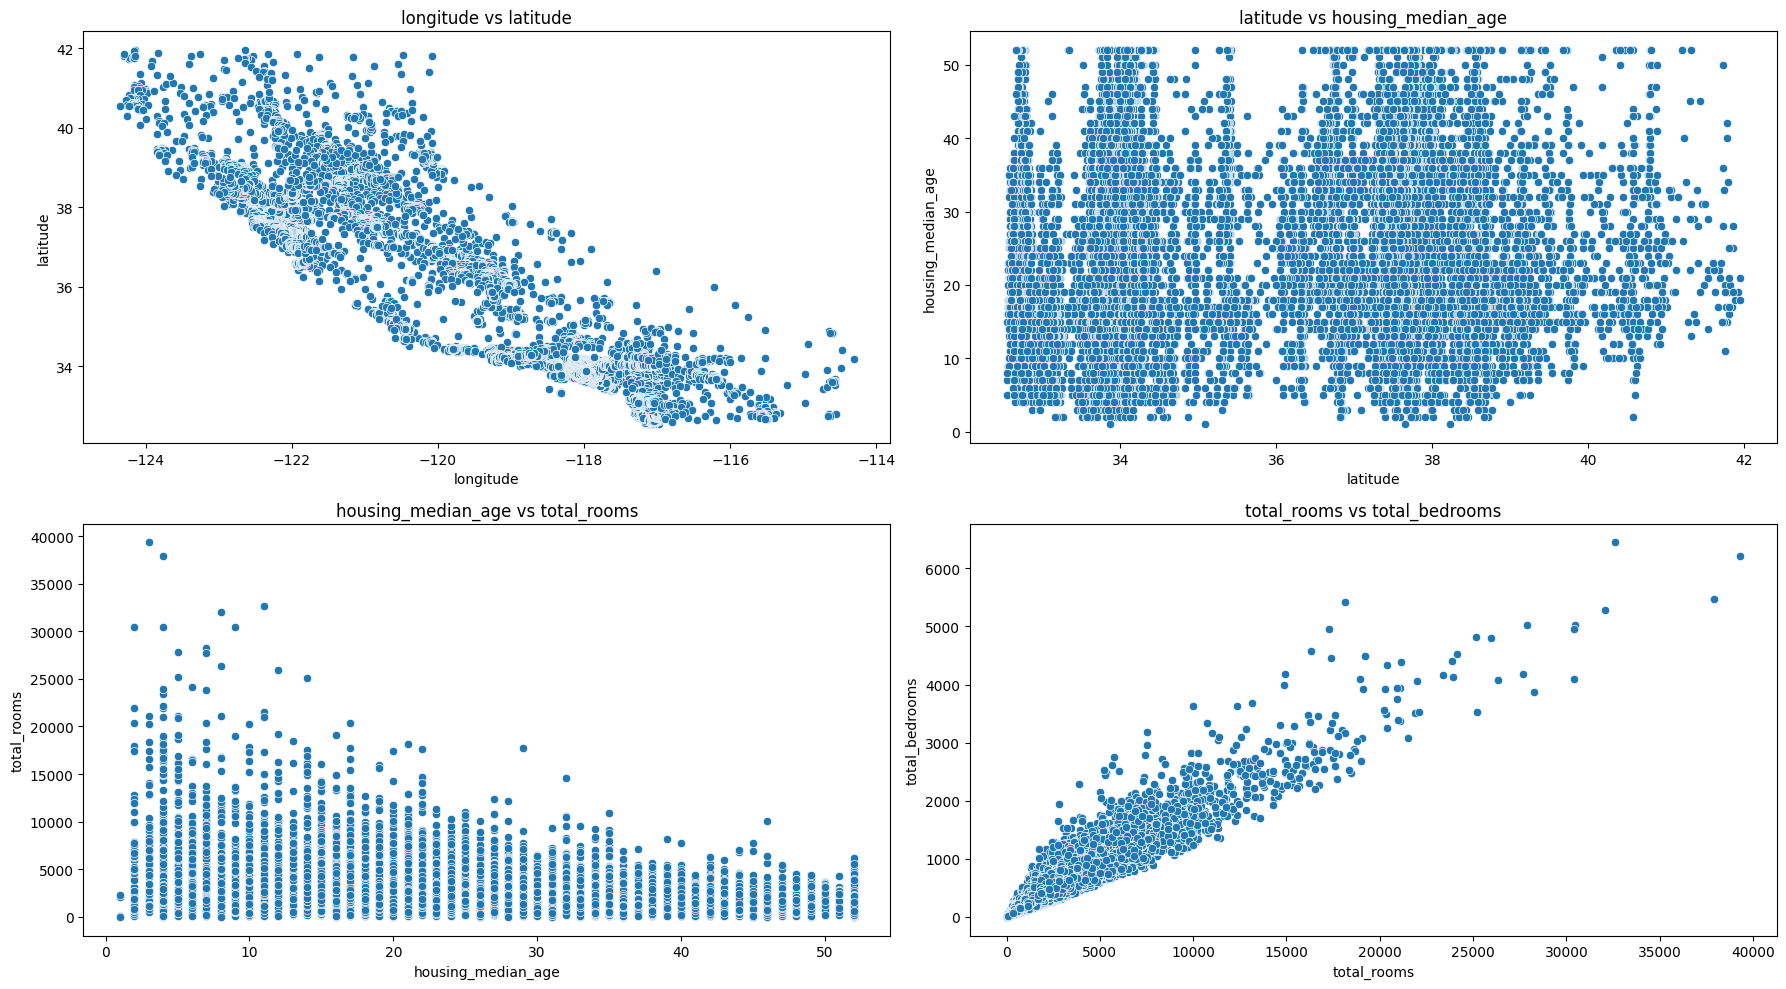

In [43]:
scatter_pairs = [
    ('longitude', 'latitude'),
    ('latitude', 'housing_median_age'),
    ('housing_median_age', 'total_rooms'),
    ('total_rooms', 'total_bedrooms')
]

plt.figure(figsize=(18, 10))
for i, (x, y) in enumerate(scatter_pairs):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(data=df, x=x, y=y)
    plt.title(f'{x} vs {y}')
plt.tight_layout()
plt.show()

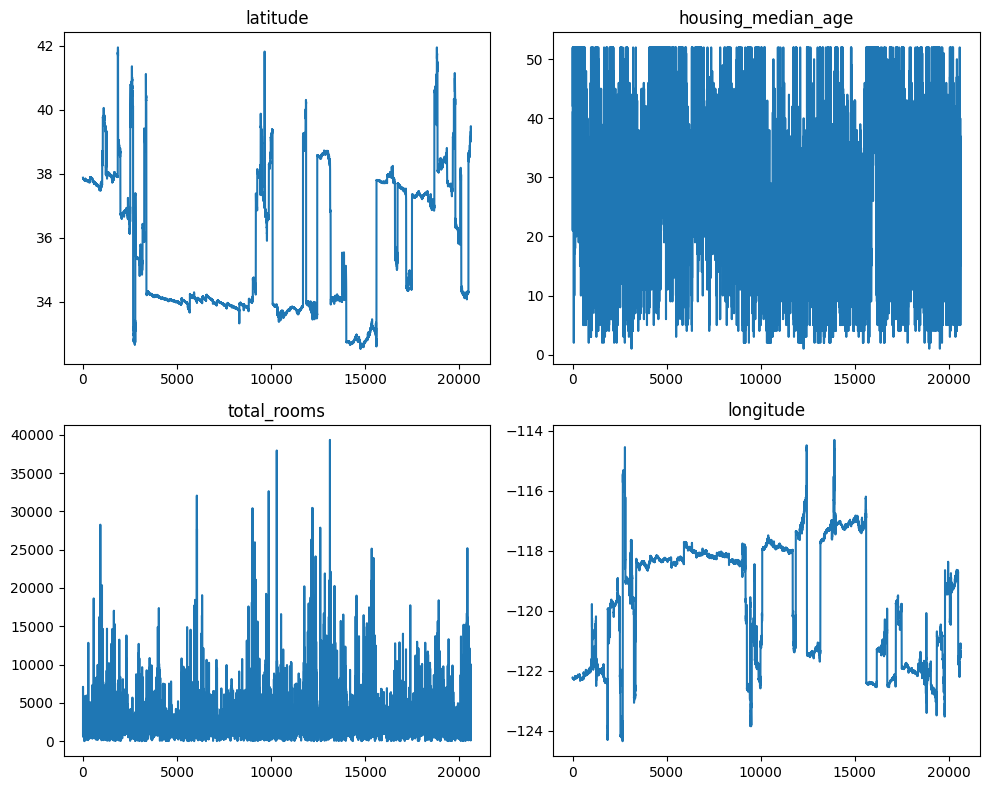

In [44]:
line_features = ['latitude', 'housing_median_age', 'total_rooms', 'longitude']

plt.figure(figsize=(10, 8))
for i, feature in enumerate(line_features):
    plt.subplot(2, 2, i+1)
    plt.plot(df[feature])
    plt.title(f'{feature}')
plt.tight_layout()
plt.show()


Pairplot of Numerical Features:


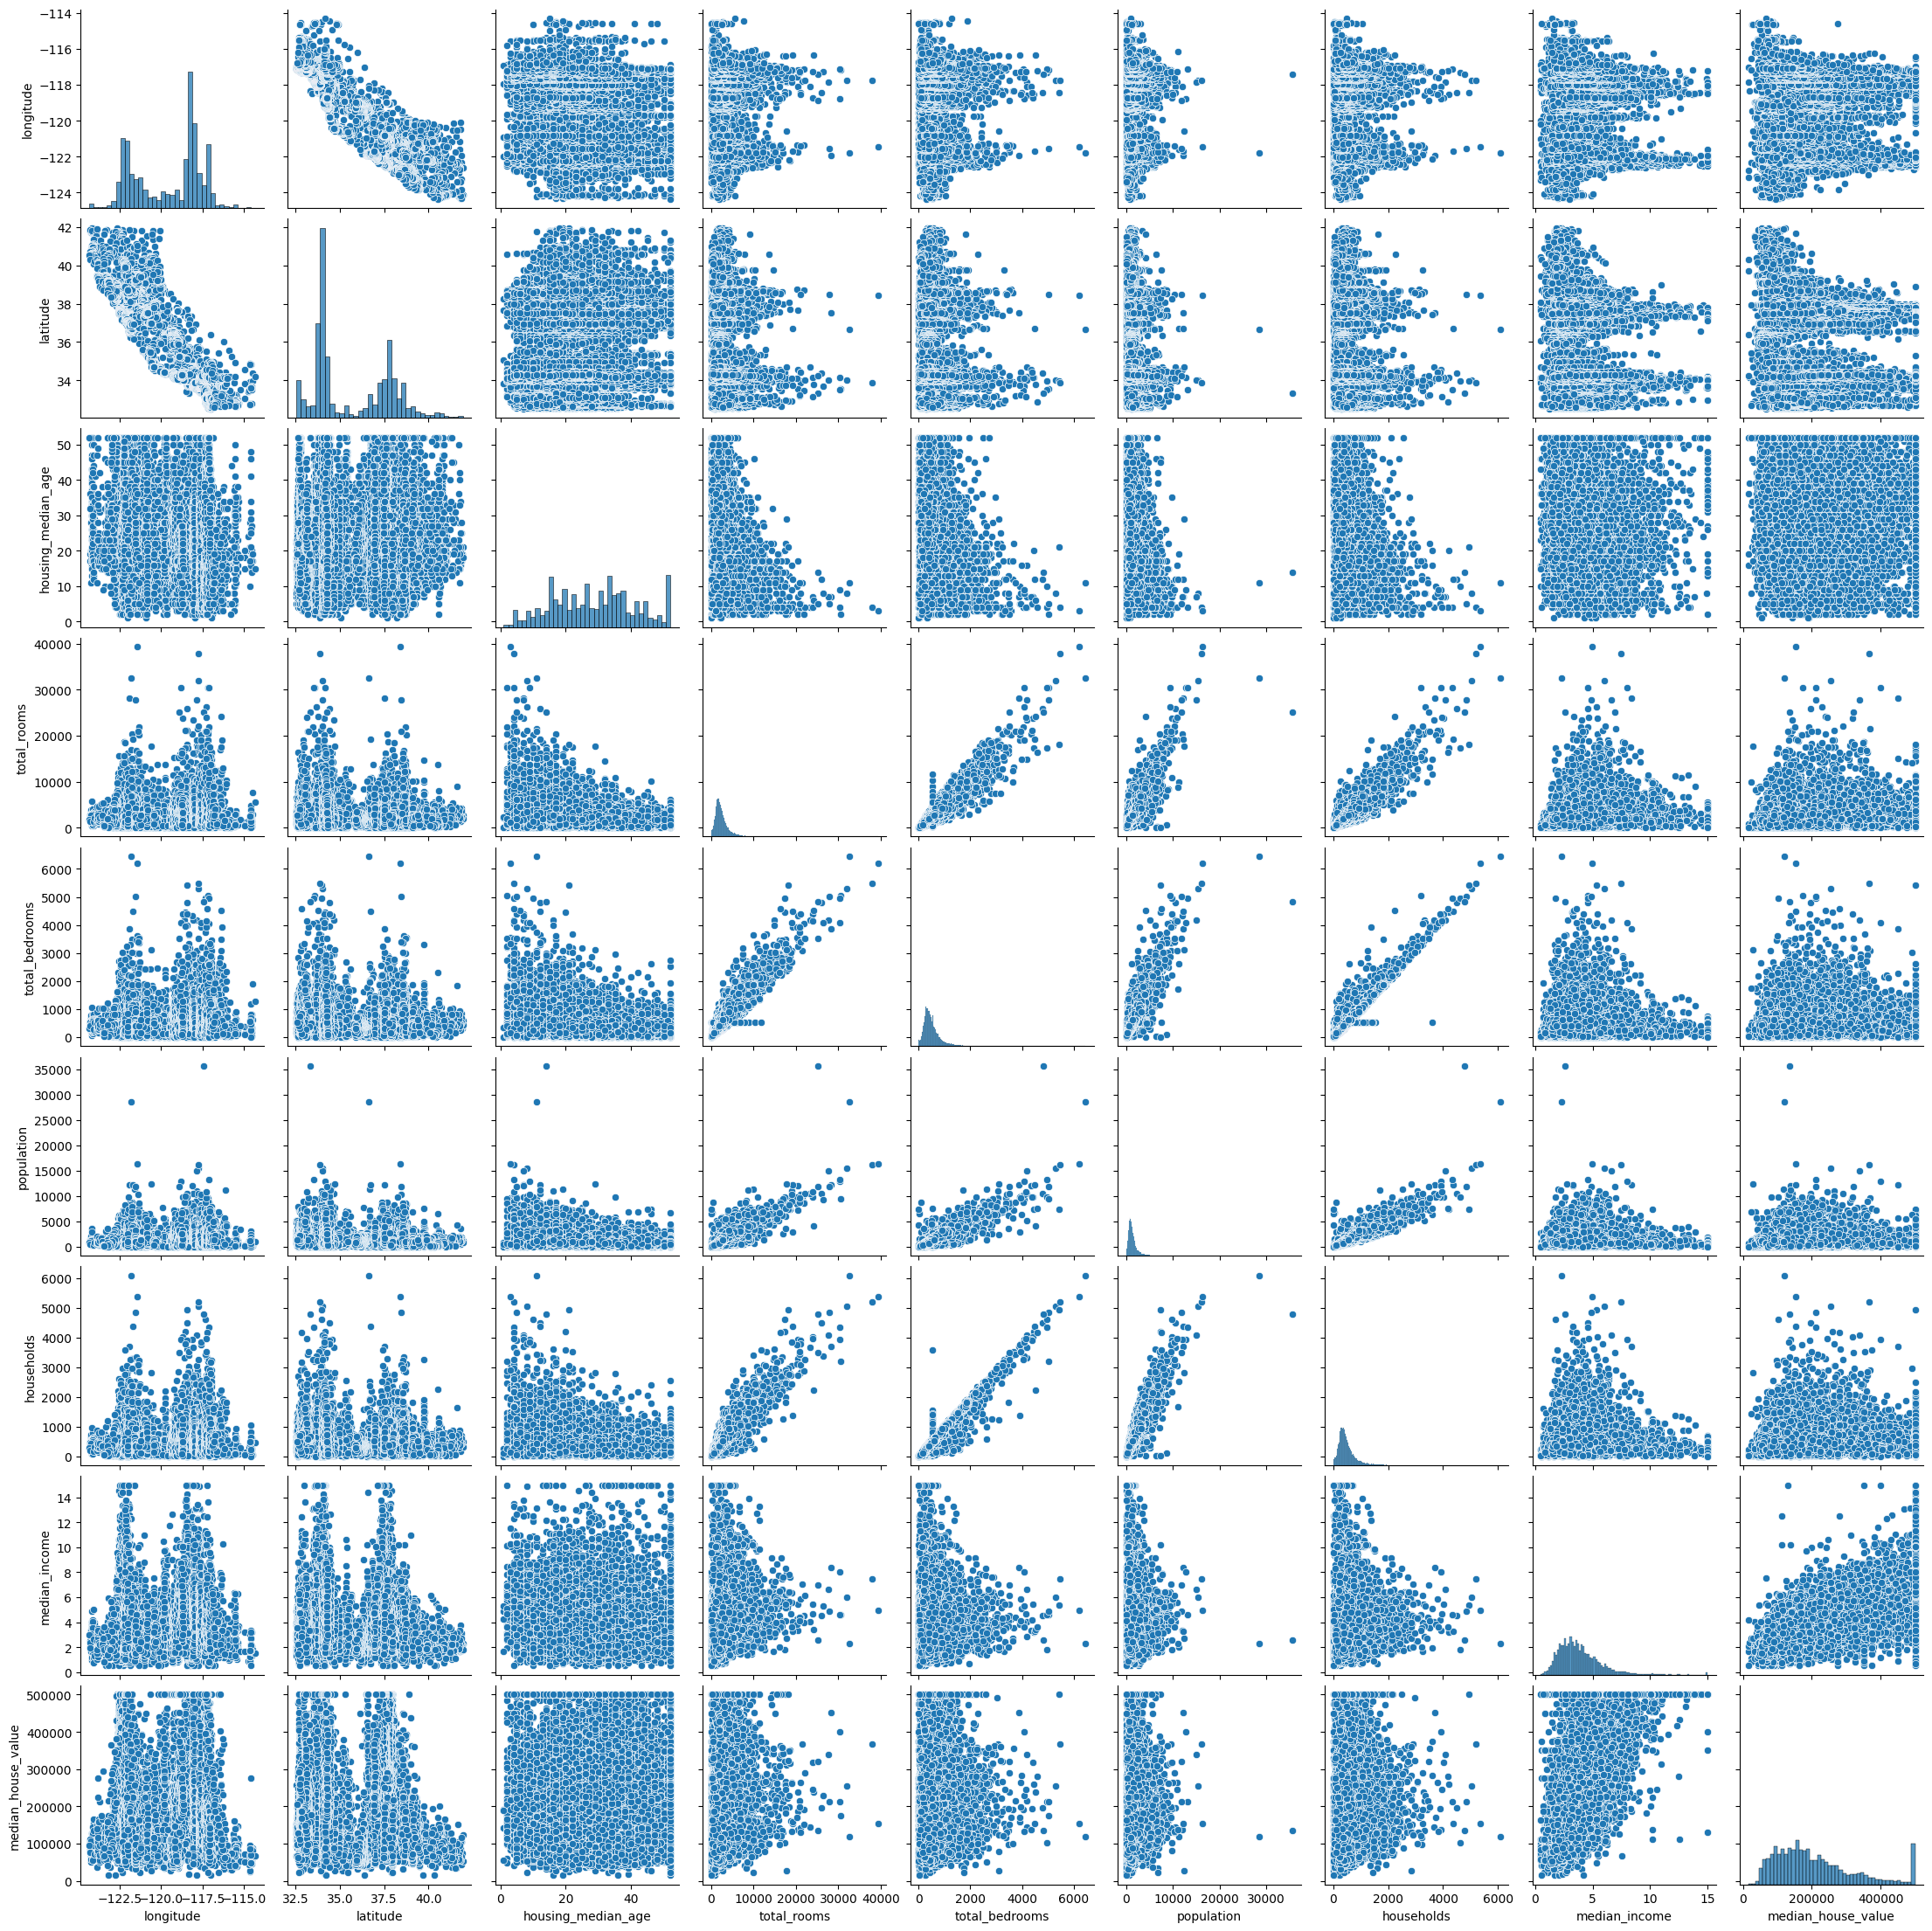

In [46]:
if len(numerical_cols) < 10: # Limit pairplot for better performance
    print("\nPairplot of Numerical Features:")
    sns.pairplot(df[numerical_cols])
    plt.show()

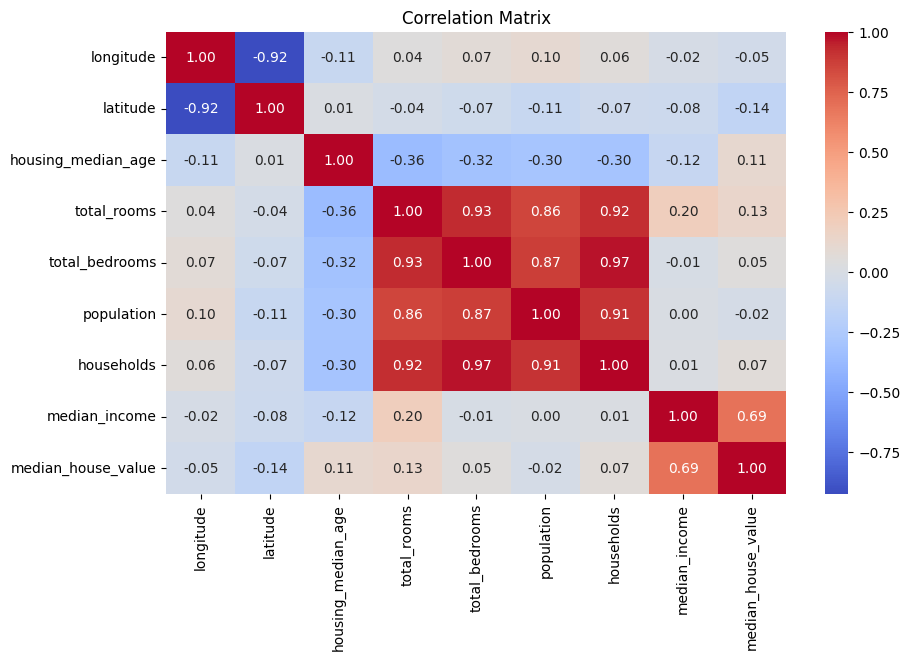

In [48]:
num_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(10, 6))
correlation = df[num_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

**PRE-PROCESSING**

In [45]:
# Handle Missing Values
numerical_cols = df.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

#Drop columns with a high percentage of missing values
threshold = 0.7 * len(df)
df.dropna(axis=1, thresh=threshold, inplace=True)

# Convert Categorical to Numeric and Feature Scaling
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Create transformers for numerical and categorical columns
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply transformations to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Apply preprocessing
df_processed = preprocessor.fit_transform(df)

In [ ]:
# Get the column names after one-hot encoding
# This can be a bit tricky because OneHotEncoder reorders columns
# We need to get the names from the preprocessor

# Get the names of the one-hot encoded features
# This might need adjustment based on your specific column names
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Combine the numerical and one-hot encoded feature names
all_feature_names = list(numerical_cols) + list(categorical_feature_names)

# Create a new DataFrame from the processed data
df_processed_df = pd.DataFrame(data=df_processed, columns=all_feature_names)

# Print the new table
print(df_processed_df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327835  1.052548            0.982143    -0.804819       -0.975228   
1  -1.322844  1.043185           -0.607019     2.045890        1.355088   
2  -1.332827  1.038503            1.856182    -0.535746       -0.829732   
3  -1.337818  1.038503            1.856182    -0.624215       -0.722399   
4  -1.337818  1.038503            1.856182    -0.462404       -0.615066   

   population  households  median_income  median_house_value  \
0   -0.974429   -0.977033       2.344766            2.129631   
1    0.861439    1.669961       2.332238            1.314156   
2   -0.820777   -0.843637       1.782699            1.258693   
3   -0.766028   -0.733781       0.932968            1.165100   
4   -0.759847   -0.629157      -0.012881            1.172900   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1   

**FEATURE SELECTION**

In [ ]:
# Assuming you are using all processed features for clustering
features_for_clustering = df_processed

**DETERMINING OPTIMAL NUMBER OF K**

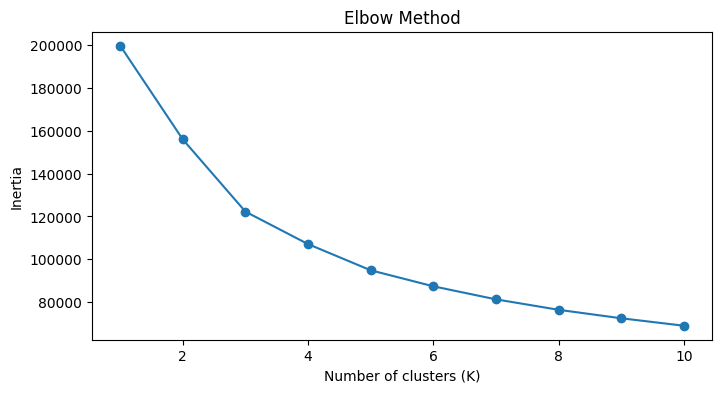

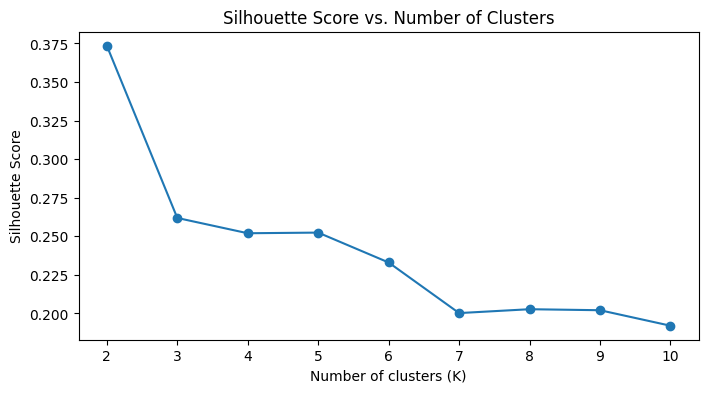

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Elbow Method
inertia = []
k_range = range(1, 11) # Experiment with a different range of K values
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_for_clustering)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Silhouette Score (Calculate for a reasonable range of K after the elbow method)
# Choose a range of K values to evaluate after observing the elbow plot
silhouette_scores = []
k_range_silhouette = range(2, 11) # K must be > 1 for silhouette score
for k in k_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_for_clustering)
    score = silhouette_score(features_for_clustering, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(k_range_silhouette, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()


In [ ]:
optimal_k = 3
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

**APPLYING K-MEANS ALGORITHM AND MODEL TRAINING**

In [ ]:
# Fit the model
kmeans_model.fit(features_for_clustering)

# Get cluster labels
cluster_labels = kmeans_model.labels_

# Add Cluster Labels to Data
# You can add the labels to the original DataFrame or a new one
df['cluster'] = cluster_labels

**VISUALIZE CLUSTERS**

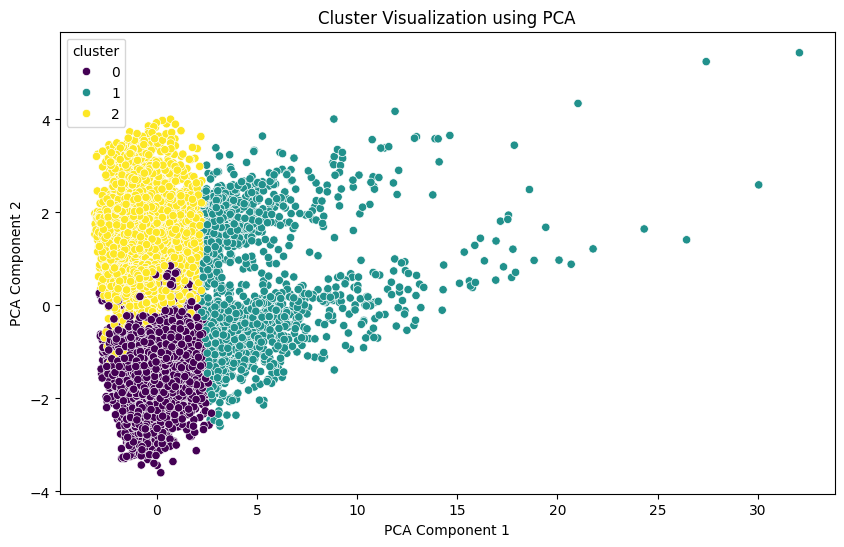

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

# Use PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_for_clustering)

# Create a DataFrame for plotting
df_pca = pd.DataFrame(data=features_pca, columns=['PCA_1', 'PCA_2'])
df_pca['cluster'] = cluster_labels

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='cluster', data=df_pca, palette='viridis', legend='full')
plt.title('Cluster Visualization using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# **MINI-BATCH K-MEANS CLUSTERING**

In [ ]:
from sklearn.cluster import MiniBatchKMeans

In [ ]:
# Apply Mini-Batch K-Means
minibatch_kmeans_model = MiniBatchKMeans(n_clusters=optimal_k, random_state=42, n_init=10)
minibatch_kmeans_model.fit(features_for_clustering)

# Get cluster labels from Mini-Batch K-Means
minibatch_cluster_labels = minibatch_kmeans_model.labels_

# Add Mini-Batch Cluster Labels to Data
df['minibatch_cluster'] = minibatch_cluster_labels

In [ ]:
# Calculate inertia for both models
standard_kmeans_inertia = kmeans_model.inertia_
minibatch_kmeans_inertia = minibatch_kmeans_model.inertia_

print(f"Standard K-Means Inertia: {standard_kmeans_inertia}")
print(f"Mini-Batch K-Means Inertia: {minibatch_kmeans_inertia}")

# You can also compare silhouette scores if desired
# standard_silhouette = silhouette_score(features_for_clustering, cluster_labels)
# minibatch_silhouette = silhouette_score(features_for_clustering, minibatch_cluster_labels)
# print(f"Standard K-Means Silhouette Score: {standard_silhouette}")
# print(f"Mini-Batch K-Means Silhouette Score: {minibatch_silhouette}")

Standard K-Means Inertia: 122225.25152867107
Mini-Batch K-Means Inertia: 122511.51502206417


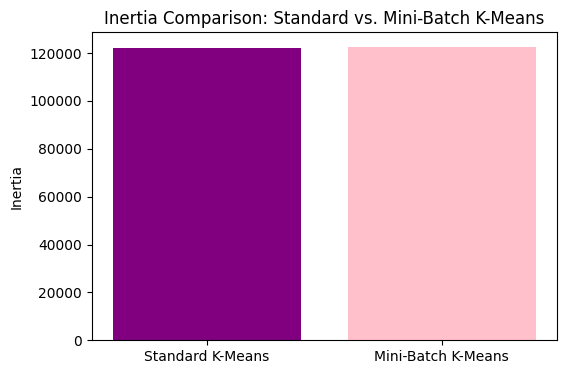

In [ ]:
# Plot Inertia Comparison
labels = ['Standard K-Means', 'Mini-Batch K-Means']
inertia_values = [standard_kmeans_inertia, minibatch_kmeans_inertia]

plt.figure(figsize=(6, 4))
plt.bar(labels, inertia_values, color=['purple', 'pink'])
plt.ylabel('Inertia')
plt.title('Inertia Comparison: Standard vs. Mini-Batch K-Means')
plt.show()

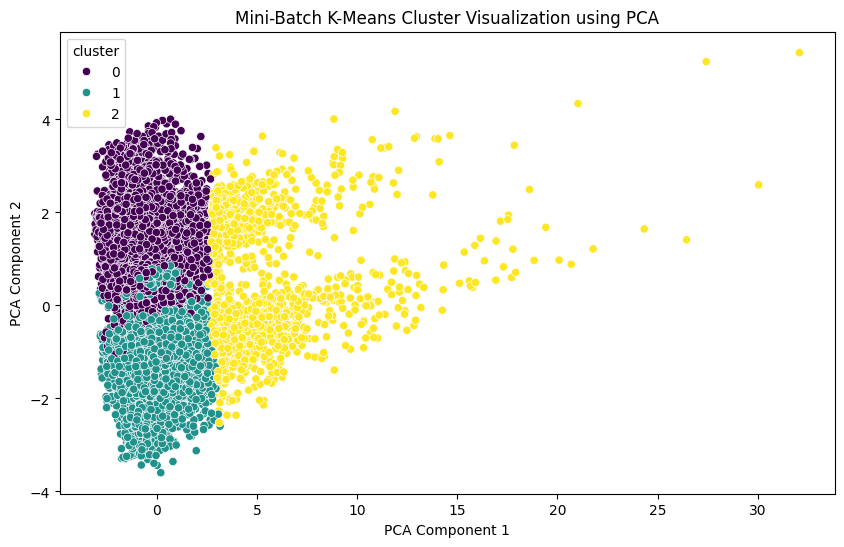

In [ ]:
# Visualize Mini-Batch K-Means Clusters using PCA
df_pca_minibatch = pd.DataFrame(data=features_pca, columns=['PCA_1', 'PCA_2'])
df_pca_minibatch['cluster'] = minibatch_cluster_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='cluster', data=df_pca_minibatch, palette='viridis', legend='full')
plt.title('Mini-Batch K-Means Cluster Visualization using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()